> # **GRADIENT BOOSTING**
> Another very popular Boosting algorithm is Gradient Boosting. Just like AdaBoost, Gradient Boosting works by `sequentially adding` predictors to an ensemble, each one correcting its predecessor. However, instead of tweaking the instance weights at every iteration like AdaBoost does, this method tries to fit the new predictor to the `residual errors made by the previous predictor`.<br><br>
> Gradient boosting is an ensemble technique that combines the predictions of multiple weak learners, typically decision trees, sequentially. The goal is to improve overall predictive performance by optimizing the model’s weights based on the errors of previous iterations, gradually reducing prediction errors and enhancing the model’s accuracy.

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings('ignore')

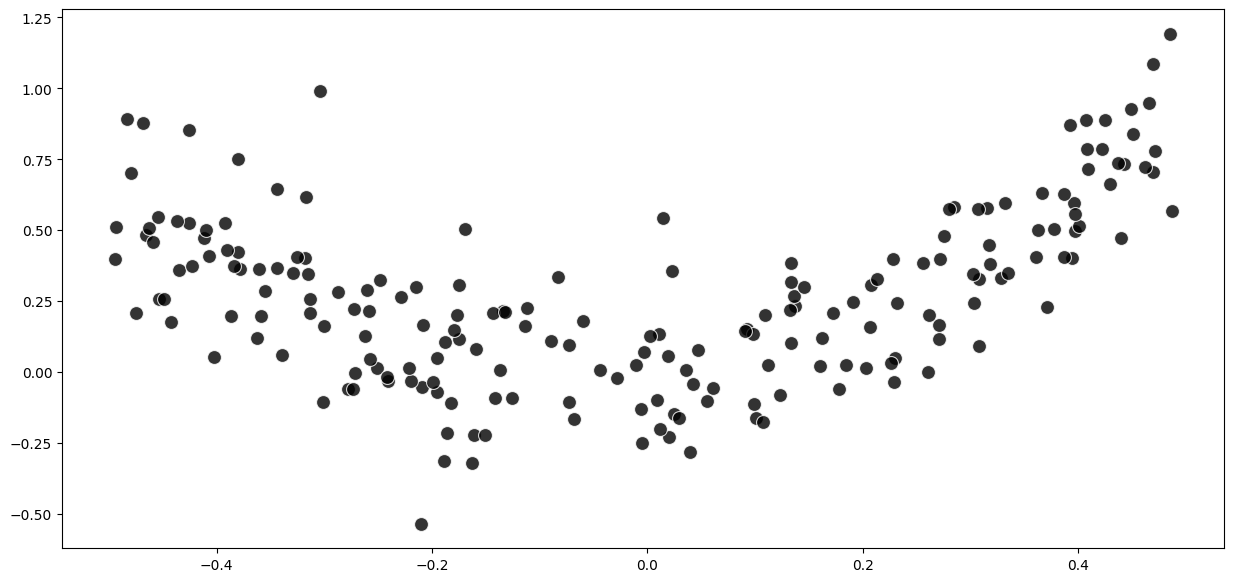

In [50]:
np.random.seed(42)
X = np.random.rand(200, 1) - 0.5
y = 2*X[:, 0]**3 + 3*X[:, 0]**2 + 0.2 * np.random.randn(200)

plt.figure(figsize=(15, 7))
sns.scatterplot(x = X.ravel(), y = y, c = 'black', s = 100, alpha = 0.8)
plt.show()

<hr>

> ### GRADIENT BOOSTING REGRESSION FROM SCRATCH

In [51]:
df = pd.DataFrame({'X': X.ravel(), 'y': y.ravel()})
df.head()

,X,y
0,-0.125460,-0.092734
1,0.450714,0.839000
2,0.231994,0.245050
3,0.098658,-0.111749
4,-0.343981,0.646722


> ### STEP 1 : FIRST PREDICTION MODEL AND ITS RESIDUALS
> - The 1st prediction model is `not an actual machine learning algorithm` but it just find the `mean of all the actual output values`.<br><br>
> - Then we will find the `residuals` - The error made by first model on actual output values

In [52]:
df['model1_pred'] = df['y'].mean()
df.head()

,X,y,model1_pred
0,-0.125460,-0.092734,0.269878
1,0.450714,0.839000,0.269878
2,0.231994,0.245050,0.269878
3,0.098658,-0.111749,0.269878
4,-0.343981,0.646722,0.269878


In [53]:
df['model1_residuals'] = df['y'] - df['model1_pred']
df.head()

,X,y,model1_pred,model1_residuals
0,-0.125460,-0.092734,0.269878,-0.362612
1,0.450714,0.839000,0.269878,0.569123
2,0.231994,0.245050,0.269878,-0.024827
3,0.098658,-0.111749,0.269878,-0.381627
4,-0.343981,0.646722,0.269878,0.376845


> ### STEP 2 : TRAINING DECISION TREE ON RESIDUALS
> - Then we train a `decision tree on residuals` and find the prediction of residuals made by first model.<br><br>
> - After that we calculate the `new prediction of y` by adding the first model prediction and the pedicted residuals.<br><br>
> - The `depth` of decision tree must be from `8 to 32`

In [54]:
dt1 = DecisionTreeRegressor(max_depth=10)
dt1.fit(df[['X']], df['model1_residuals'])

DecisionTreeRegressor(max_depth=10)

In [55]:
df['model1_residuals_pred'] = dt1.predict(X)
df.head()

,X,y,model1_pred,model1_residuals,model1_residuals_pred
0,-0.125460,-0.092734,0.269878,-0.362612,-0.228373
1,0.450714,0.839000,0.269878,0.569123,0.569123
2,0.231994,0.245050,0.269878,-0.024827,-0.024827
3,0.098658,-0.111749,0.269878,-0.381627,-0.381627
4,-0.343981,0.646722,0.269878,0.376845,0.103201


In [56]:
learning_rate = 0.5 # LEARNING RATE - REDUCING `OVERFITTING`
df['model2_pred'] = df['model1_pred'] + (learning_rate * df['model1_residuals_pred'])
df.head()

,X,y,model1_pred,model1_residuals,model1_residuals_pred,model2_pred
0,-0.125460,-0.092734,0.269878,-0.362612,-0.228373,0.155691
1,0.450714,0.839000,0.269878,0.569123,0.569123,0.554439
2,0.231994,0.245050,0.269878,-0.024827,-0.024827,0.257464
3,0.098658,-0.111749,0.269878,-0.381627,-0.381627,0.079064
4,-0.343981,0.646722,0.269878,0.376845,0.103201,0.321478


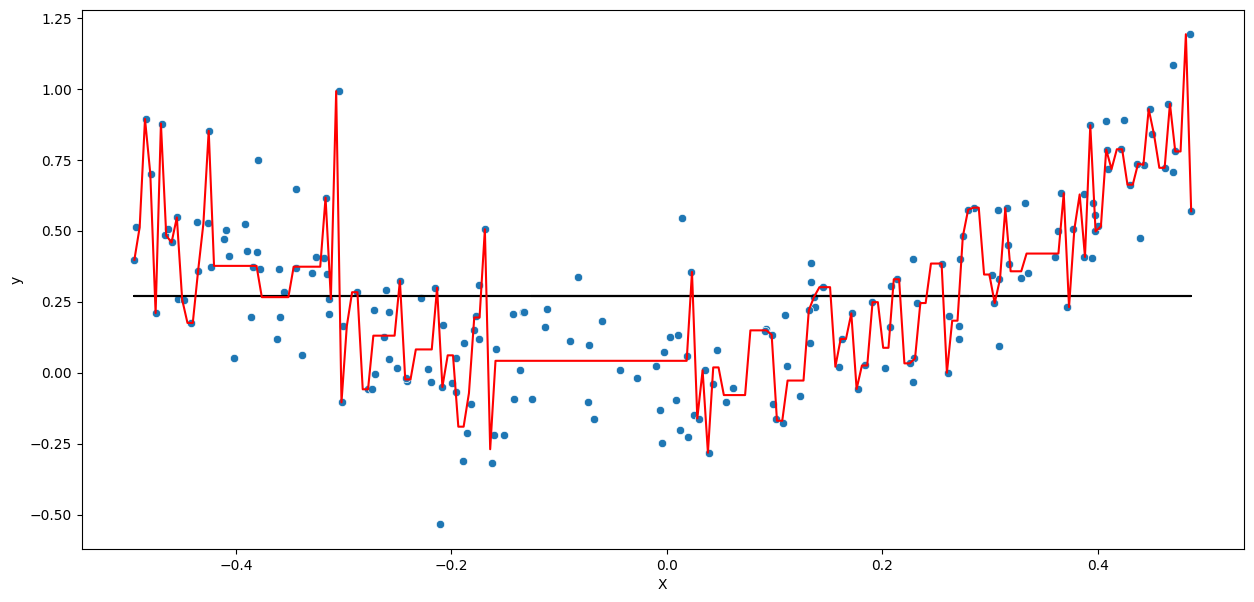

In [57]:
temp_x = np.linspace(df['X'].min(), df['X'].max(), 200)
model2_pred = df['y'].mean() + dt1.predict(temp_x.reshape(-1, 1))

plt.figure(figsize=(15, 7))
sns.scatterplot(x = df['X'], y = df['y'])
plt.plot(df['X'], df['model1_pred'], color = 'black')
plt.plot(temp_x, model2_pred, color = 'red')
plt.show()

> ### STEP 3 : APPLY SAME STEPS OVER NEW MODEL

In [58]:
df['model2_residuals'] = df['y'] - df['model2_pred']
df.head()

,X,y,model1_pred,model1_residuals,model1_residuals_pred,model2_pred,model2_residuals
0,-0.125460,-0.092734,0.269878,-0.362612,-0.228373,0.155691,-0.248425
1,0.450714,0.839000,0.269878,0.569123,0.569123,0.554439,0.284561
2,0.231994,0.245050,0.269878,-0.024827,-0.024827,0.257464,-0.012414
3,0.098658,-0.111749,0.269878,-0.381627,-0.381627,0.079064,-0.190813
4,-0.343981,0.646722,0.269878,0.376845,0.103201,0.321478,0.325245


In [59]:
dt2 = DecisionTreeRegressor()
dt2.fit(df[['X']], df['model2_residuals'])

DecisionTreeRegressor()

In [60]:
df['model2_residuals_pred'] = dt2.predict(X)
df.head()

,X,y,model1_pred,model1_residuals,model1_residuals_pred,model2_pred,model2_residuals,model2_residuals_pred
0,-0.125460,-0.092734,0.269878,-0.362612,-0.228373,0.155691,-0.248425,-0.248425
1,0.450714,0.839000,0.269878,0.569123,0.569123,0.554439,0.284561,0.284561
2,0.231994,0.245050,0.269878,-0.024827,-0.024827,0.257464,-0.012414,-0.012414
3,0.098658,-0.111749,0.269878,-0.381627,-0.381627,0.079064,-0.190813,-0.190813
4,-0.343981,0.646722,0.269878,0.376845,0.103201,0.321478,0.325245,0.325245


In [61]:
df['model3_pred'] = df['model2_pred'] + learning_rate * df['model2_residuals_pred']
df.head()

,X,y,model1_pred,model1_residuals,model1_residuals_pred,model2_pred,model2_residuals,model2_residuals_pred,model3_pred
0,-0.125460,-0.092734,0.269878,-0.362612,-0.228373,0.155691,-0.248425,-0.248425,0.031478
1,0.450714,0.839000,0.269878,0.569123,0.569123,0.554439,0.284561,0.284561,0.696720
2,0.231994,0.245050,0.269878,-0.024827,-0.024827,0.257464,-0.012414,-0.012414,0.251257
3,0.098658,-0.111749,0.269878,-0.381627,-0.381627,0.079064,-0.190813,-0.190813,-0.016343
4,-0.343981,0.646722,0.269878,0.376845,0.103201,0.321478,0.325245,0.325245,0.484100


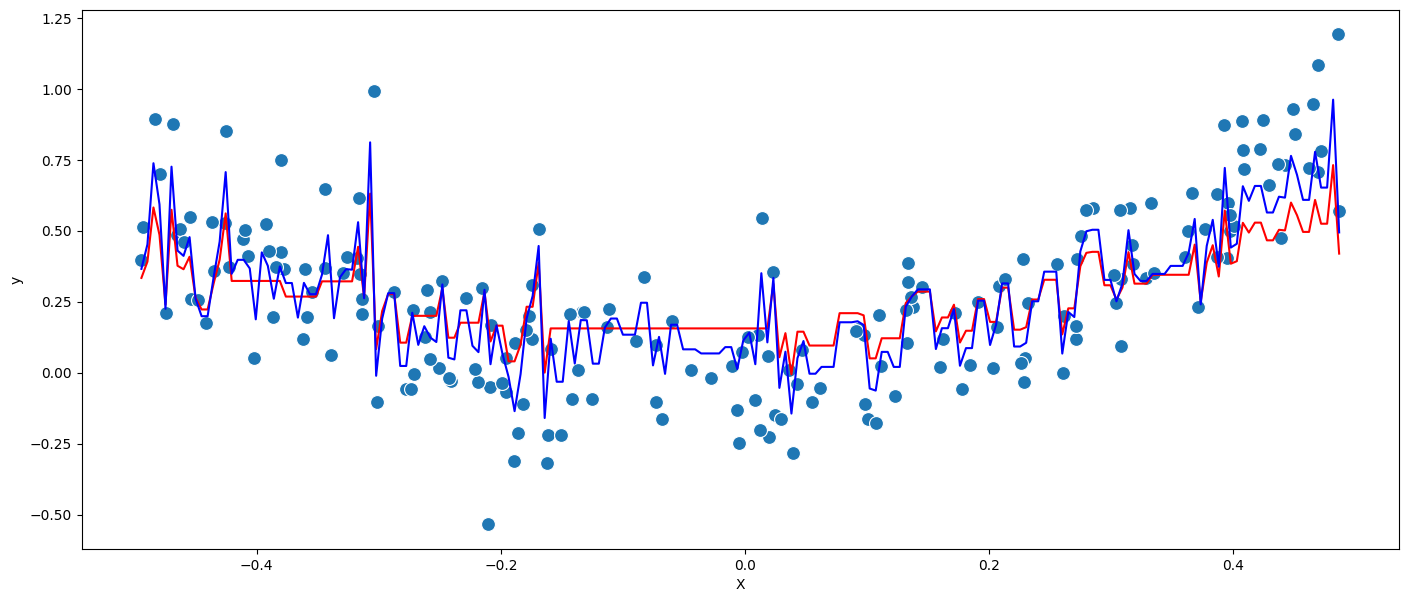

In [71]:
temp_x = np.linspace(df['X'].min(), df['X'].max(), 200)
model2_pred = df['y'].mean() + learning_rate * dt1.predict(temp_x.reshape(-1, 1))
model3_pred = model2_pred + learning_rate * dt2.predict(temp_x.reshape(-1, 1))

plt.figure(figsize=(17, 7))
sns.scatterplot(x = df['X'], y = df['y'], s = 100)
plt.plot(temp_x, model2_pred, color = 'red')
plt.plot(temp_x, model3_pred, color = 'blue')
plt.show()

<HR>

> ### SKLEARN CLASS - `GradientBoostingRegressor`

In [72]:
from sklearn.ensemble import GradientBoostingRegressor
gdrt = GradientBoostingRegressor(
    n_estimators = 5000,
    loss = 'squared_error',
    criterion='friedman_mse', # The function to measure the quality of a split. -> For Decision Trees
    learning_rate = 0.01,
    subsample = 0.8,
    max_depth = 50,
    max_features = 0.6,
    n_iter_no_change = 10,
    random_state = 42
    # Other - Decision Tree Hyperparameters
)
gdrt.fit(df[['X']], df['y'])

GradientBoostingRegressor(learning_rate=0.01, max_depth=50, max_features=0.6,
                          n_estimators=5000, n_iter_no_change=10,
                          random_state=42, subsample=0.8)

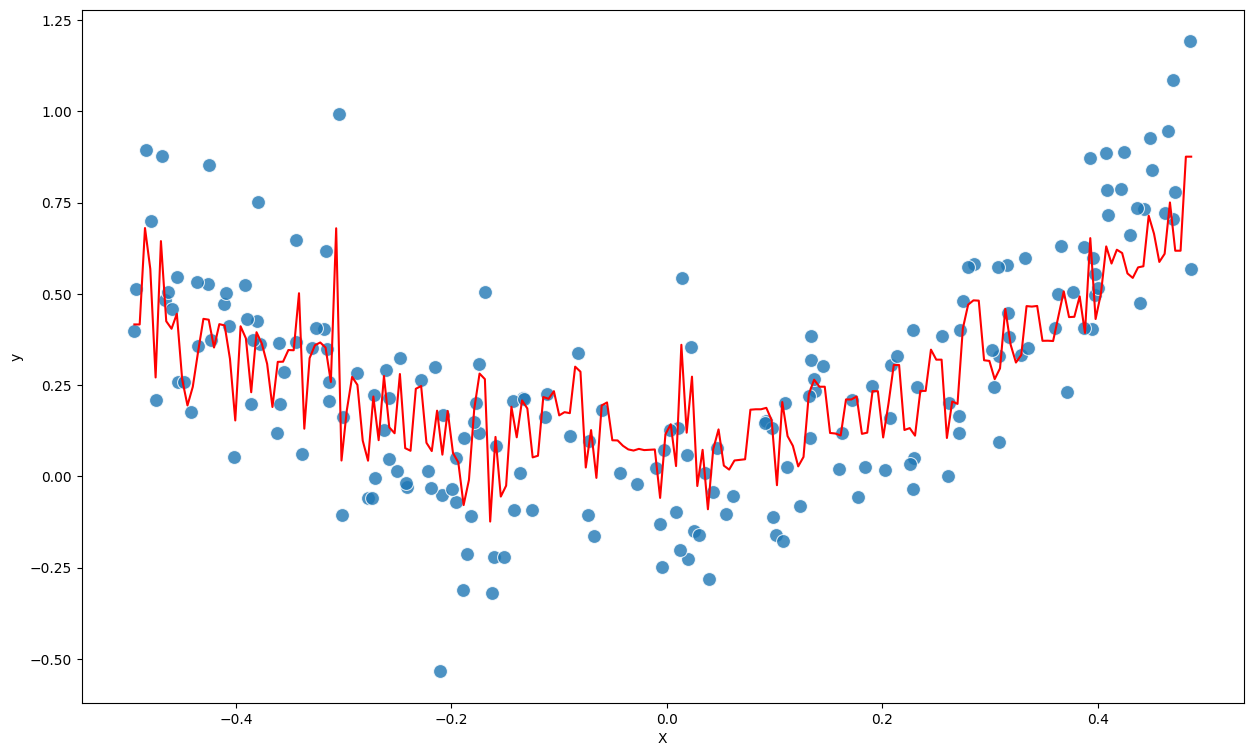

In [73]:
import seaborn as sns
temp_x = np.linspace(df['X'].min(), df['X'].max(), 200)
plt.figure(figsize=(15, 9))
sns.scatterplot(x=df['X'], y=df['y'], s = 100, alpha = 0.8)
plt.plot(temp_x.reshape(-1, 1), gdrt.predict(temp_x.reshape(-1, 1)), color = 'red')
plt.show()